In [20]:
import pandas as pd
import matplotlib.pyplot as plt
# from io import StringIO

import jax.numpy as jnp

In [3]:
df = pd.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', parse_dates={'Datetime': ['Date', 'Time']}, dayfirst=True)
df.head()

/var/folders/2v/gfm3z1tn5fj8zss_r9hrgnv80000gn/T/ipykernel_70306/3252816531.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', parse_dates={'Datetime': ['Date', 'Time']}, dayfirst=True)
/var/folders/2v/gfm3z1tn5fj8zss_r9hrgnv80000gn/T/ipykernel_70306/3252816531.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', parse_dates={'Datetime': ['Date', 'Time']}, dayfirst=True)


,Datetime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004 18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004 19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004 20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004 21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004 22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [4]:
df.iloc[:,1]

0       2.6
1       2.0
2       2.2
3       2.2
4       1.6
       ... 
9466    NaN
9467    NaN
9468    NaN
9469    NaN
9470    NaN
Name: CO(GT), Length: 9471, dtype: float64

In [5]:
df.columns

Index(['Datetime', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

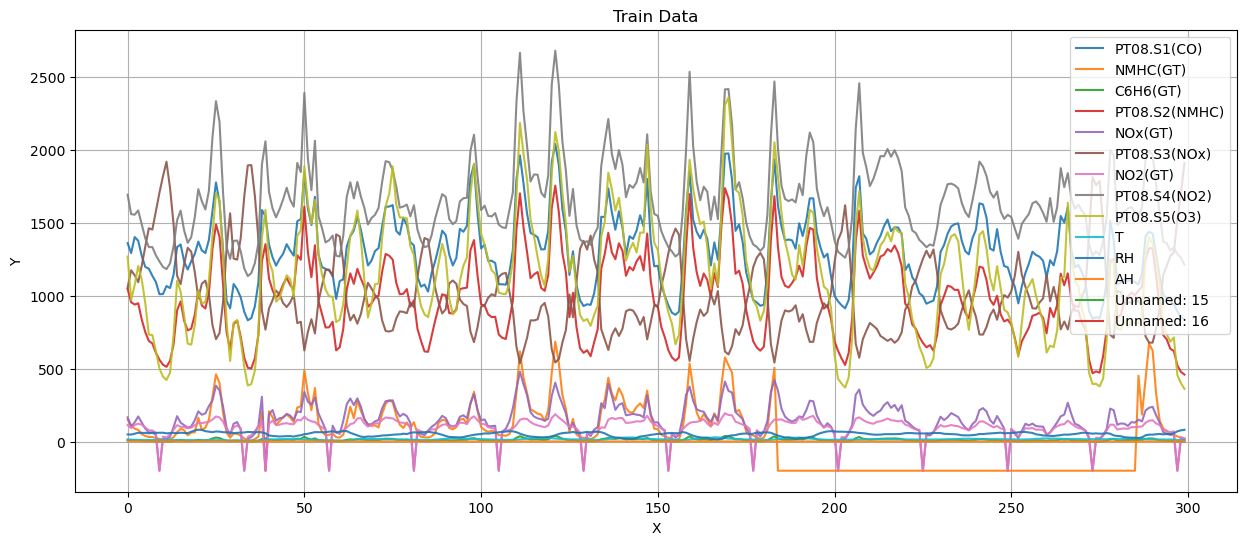

In [9]:
plt.figure(figsize=(15, 6))
k = 300
for col in df.columns[2:]:
    plt.plot(df.index[:k], df[col][:k], label=col, alpha=0.9)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Train Data')
plt.grid(True)
plt.show()

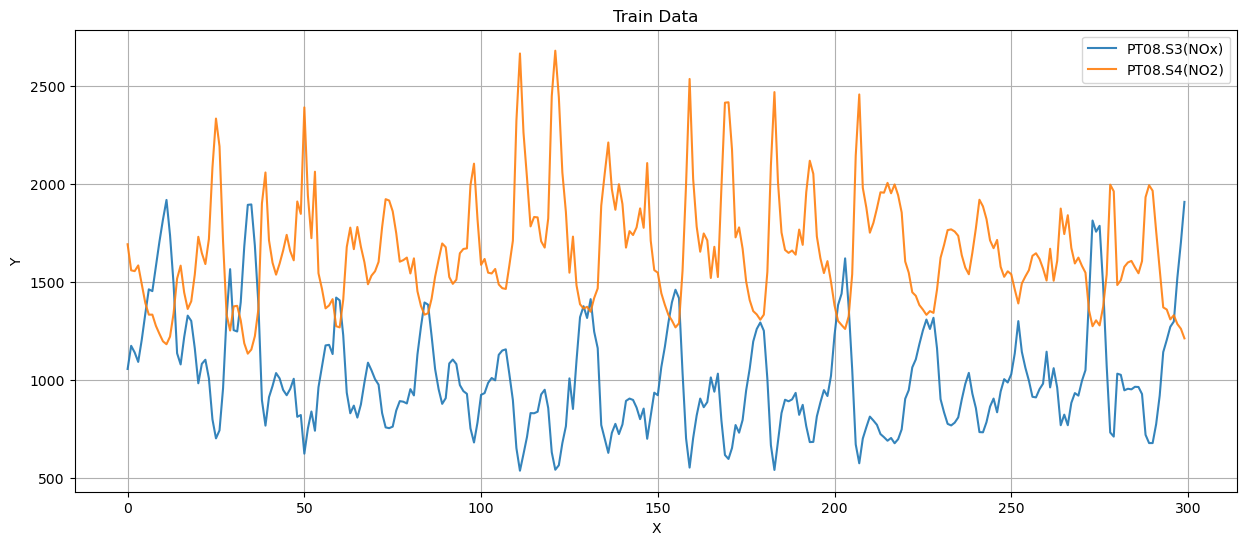

In [7]:
plt.figure(figsize=(15, 6))
k = 300
for col in df.columns[1:]:
    if col == 'PT08.S4(NO2)' or col == 'PT08.S3(NOx)':
        plt.plot(df.index[:k], df[col][:k], label=col, alpha=0.9)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Train Data')
plt.grid(True)
plt.show()

## Load the model files

In [14]:
import sys
import os
import importlib
from jax import random, jit

path_ = os.path.abspath(os.path.join('..', '04_energy_consumption_reformat'))

# Add the directory to sys.path
if path_ not in sys.path:
    sys.path.append(path_)

In [13]:
import nn_jax_diffrax
importlib.reload(nn_jax_diffrax)
NeuralODE_JAX = nn_jax_diffrax.NeuralODE

In [17]:
ys = df[['PT08.S4(NO2)', 'PT08.S3(NOx)']].values
print(ys.shape)

ys = ys[:300]
print(ys.shape)

(9471, 2)
(300, 2)


#### Scale

#### Index

In [21]:
ts = jnp.linspace(0, 1, len(ys))

In [44]:
y_pred_results = {}

layer_widths = [2, 64, 64, 2]
learning_rate = 1e-3
rng = random.PRNGKey(42)

node_model = NeuralODE_JAX(layer_widths, time_invariant=True)
state = node_model.create_train_state(rng, learning_rate)

y0 = ys[0]
for k in [10, 100]:
    state = node_model.train( state, ts[:k] 
                            , ys[:k], y0
                            , num_epochs = 50000
                            )

Epoch 100, Loss: 1956196.875
Epoch 200, Loss: 1954604.5
Epoch 300, Loss: 1953095.875
Epoch 400, Loss: 1951620.0
Epoch 500, Loss: 1950159.0
Epoch 600, Loss: 1948709.875
Epoch 700, Loss: 1947266.25
Epoch 800, Loss: 1945828.5
Epoch 900, Loss: 1944394.0
Epoch 1000, Loss: 1942962.25
Epoch 1100, Loss: 1941535.625
Epoch 1200, Loss: 1940108.625
Epoch 1300, Loss: 1938683.625
Epoch 1400, Loss: 1937263.0
Epoch 1500, Loss: 1935843.25
Epoch 1600, Loss: 1934421.75
Epoch 1700, Loss: 1933006.5
Epoch 1800, Loss: 1931589.25
Epoch 1900, Loss: 1930173.375
Epoch 2000, Loss: 1928760.0
Epoch 2100, Loss: 1927349.875
Epoch 2200, Loss: 1925937.875
Epoch 2300, Loss: 1924524.25
Epoch 2400, Loss: 1923115.75
Epoch 2500, Loss: 1921705.625
Epoch 2600, Loss: 1920296.875
Epoch 2700, Loss: 1918889.875
Epoch 2800, Loss: 1917483.75
Epoch 2900, Loss: 1916075.5
Epoch 3000, Loss: 1914671.25
Epoch 3100, Loss: 1913268.25
Epoch 3200, Loss: 1911862.75
Epoch 3300, Loss: 1910458.25
Epoch 3400, Loss: 1909055.625
Epoch 3500, Loss: 1

KeyboardInterrupt: 

In [41]:
y_train_pred = node_model.neural_ode(state.params, y0, ts[:k], state)

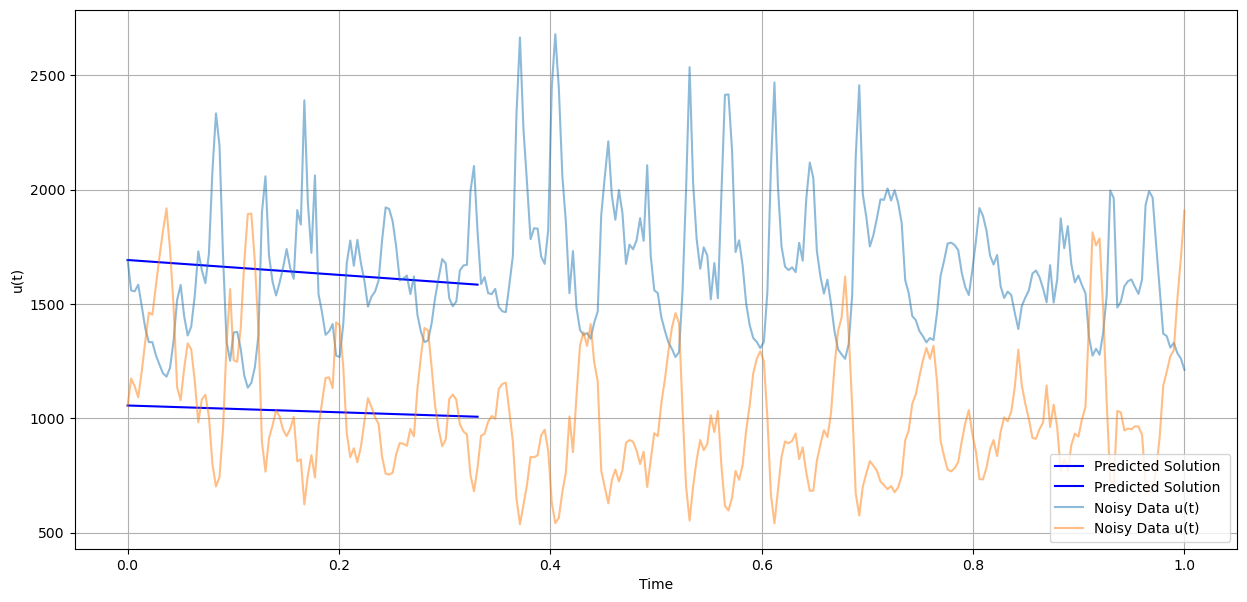

In [42]:
#---------------------------PLOTTING RESULTS--------------------------#
plt.figure(figsize=(15, 7))
plt.plot(ts[:k], y_train_pred, 'b', label='Predicted Solution ')
#plt.plot(t_test_vdp[N-1:], result['y_test_pred'], 'b', label='Predicted Solution')
#plt.plot(t_test_vdp, y_test_vdp, 'g--', label='True Solution')

plt.plot(ts, ys, label='Noisy Data u(t)', alpha = 0.5)


plt.xlabel('Time')
plt.ylabel('u(t)')
plt.legend(loc ="lower right")
plt.grid(True)
plt.show()